<b> Example: </b> Let's define some points

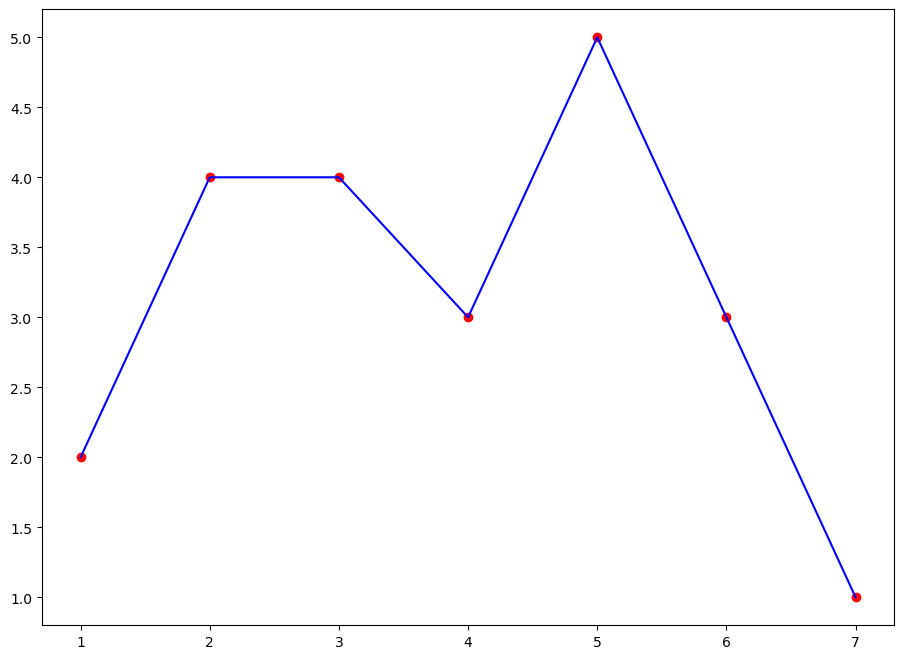

In [39]:
import numpy as np
import matplotlib.pyplot as plt

x = range(1,8)
y = [2,4,4,3,5,3,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(x, y, 'ro')
plt.plot(x, y, 'b-')
plt.show()

[[1.         0.         0.         0.        ]
 [1.         0.33333333 0.11111111 0.03703704]
 [1.         0.66666667 0.44444444 0.2962963 ]
 [1.         1.         1.         1.        ]]
[[  1.    0.    0.    0. ]
 [ -5.5   9.   -4.5   1. ]
 [  9.  -22.5  18.   -4.5]
 [ -4.5  13.5 -13.5   4.5]]
(4, 4)
(4,)


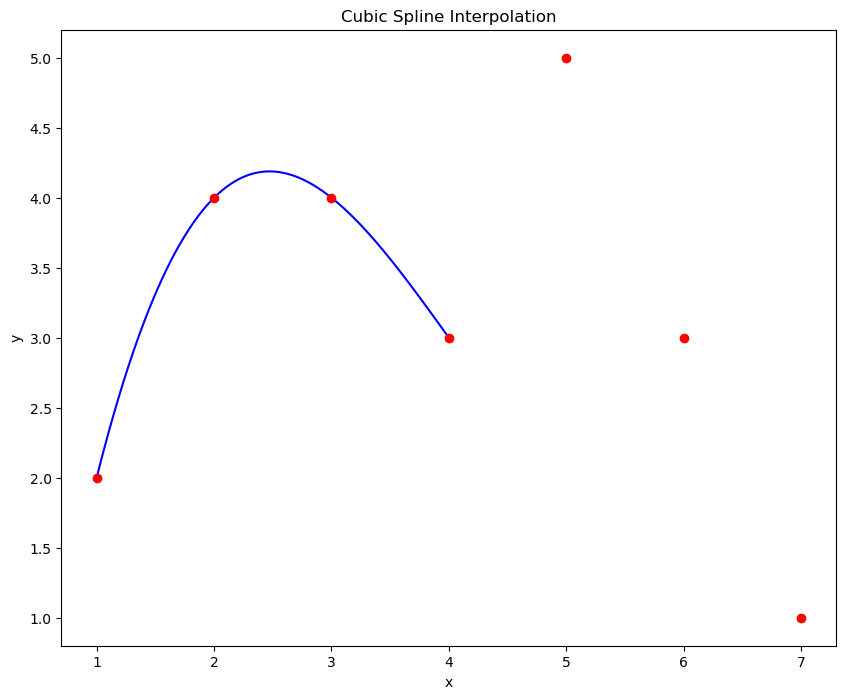

In [40]:
#polynomial interpolation?

order = 3
xs = x[0:4]
ys = y[0:4]

a = np.zeros((4,4))

#here we write the matrix to interpolate (A)
for i in range(0,order+1):
    a[i,0]=1
    for j in range(1,order+1):
        a[i,j]=np.power((i/np.float32((order))),j)

print(a)

am = np.linalg.inv(a)
print(am)
print(np.shape(am))
print(np.shape(xs))

#interpolation is done independently in x, y (z)

#rendering is done estimating a dense sampling. 
#here we do in a "stupid" way
ls =np.linspace(0,1,1000)
c = np.matmul(am,xs)
xn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls 
c = np.matmul(am,ys)
yn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls  
plt.figure(figsize = (10,8))


plt.plot(xn, yn, 'b')
plt.title('Cubic Spline Interpolation')
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




<b> exercise: </b> complete the patch-based interpolation with the other points using cubic interpolating splines
# 

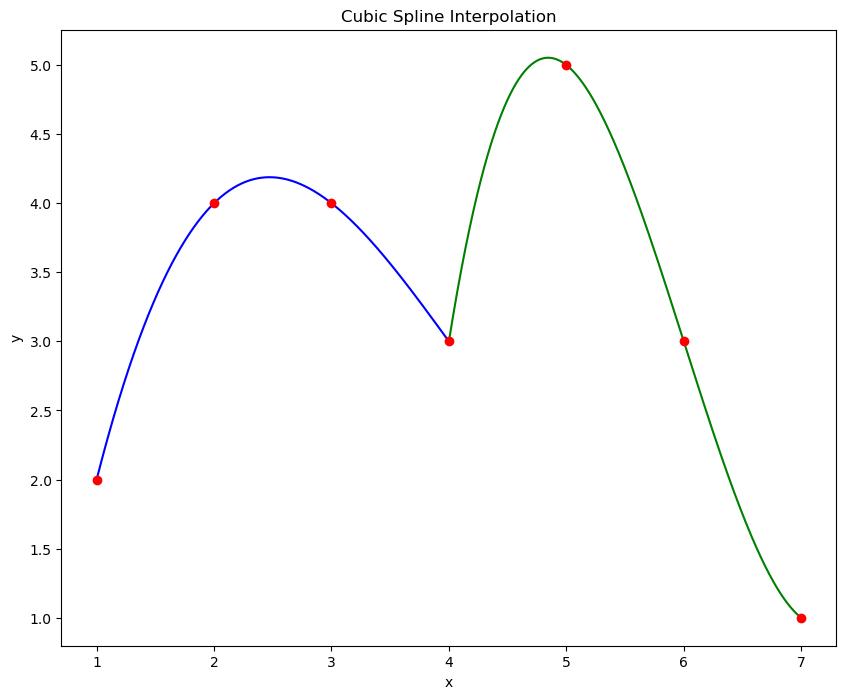

In [41]:
plt.figure(figsize = (10,8))
plt.plot(xn, yn, 'b')

xs = x[3:7]
ys = y[3:7]
ls =np.linspace(0,1,1000)
c = np.matmul(am,xs)
xn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls 
c = np.matmul(am,ys)
yn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls  
plt.plot(xn, yn, 'g')
plt.plot(x, y, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')



plt.show()

Interpolate all the point just increasing the order of the polynomials

[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.66666667e-01 2.77777778e-02 4.62962963e-03
  7.71604938e-04 1.28600823e-04 2.14334705e-05]
 [1.00000000e+00 3.33333333e-01 1.11111111e-01 3.70370370e-02
  1.23456790e-02 4.11522634e-03 1.37174211e-03]
 [1.00000000e+00 5.00000000e-01 2.50000000e-01 1.25000000e-01
  6.25000000e-02 3.12500000e-02 1.56250000e-02]
 [1.00000000e+00 6.66666667e-01 4.44444444e-01 2.96296296e-01
  1.97530864e-01 1.31687243e-01 8.77914952e-02]
 [1.00000000e+00 8.33333333e-01 6.94444444e-01 5.78703704e-01
  4.82253086e-01 4.01877572e-01 3.34897977e-01]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]]
[[ 1.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00  0.0000e+00
   0.0000e+00]
 [-1.4700e+01  3.6000e+01 -4.5000e+01  4.0000e+01 -2.2500e+01  7.2000e+00
  -1.0000e+00]
 [ 8.1200e+01 -3.1320e+02  5.2650e+02 -5.0800e+02  

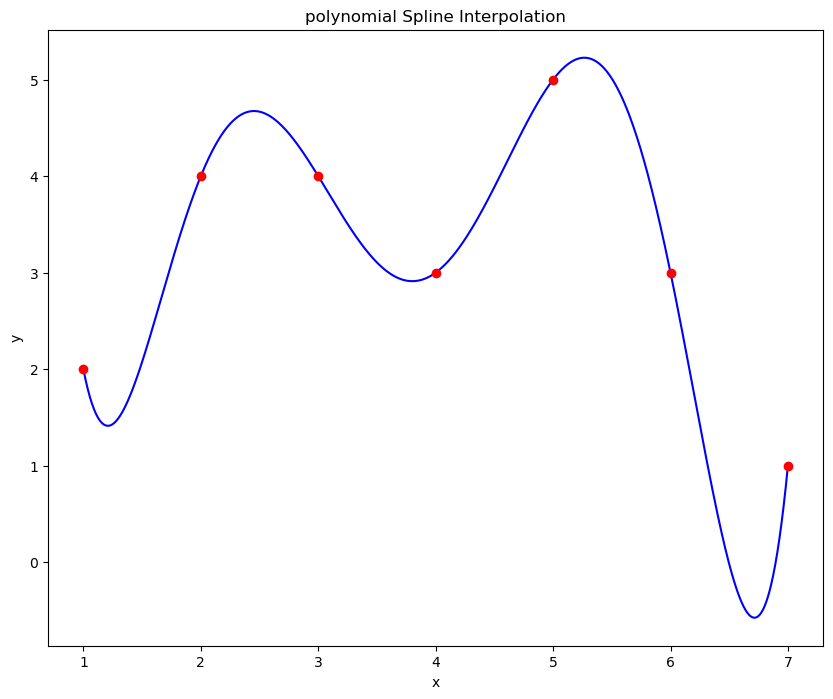

In [42]:
#It is safe to increase polynomial order?

order = 6
xs = x[0:7]
ys = y[0:7]

a = np.zeros((7,7))

#here we write the matrix to interpolate (A)
for i in range(0,order+1):
    a[i,0]=1
    for j in range(1,order+1):
        a[i,j]=np.power((i/np.float32((order))),j)

print(a)

am = np.linalg.inv(a)
print(am)
print(np.shape(am))
print(np.shape(xs))

#interpolation is done independently in x, y (z)
#rendering is done estimating a dense sampling. 
#here we do in a "stupid" way
ls =np.linspace(0,1,1000)
c = np.matmul(am,xs)
xn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls + c[4]*ls*ls*ls*ls + c[5]*ls*ls*ls*ls*ls + c[6]*ls*ls*ls*ls*ls*ls   
c = np.matmul(am,ys)
yn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls  + c[4]*ls*ls*ls*ls + c[5]*ls*ls*ls*ls*ls + c[6]*ls*ls*ls*ls*ls*ls  

plt.figure(figsize = (10,8))
plt.plot(xn, yn, 'b')
plt.title('polynomial Spline Interpolation')
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()




* Cubic bezier interpolation (first points) 

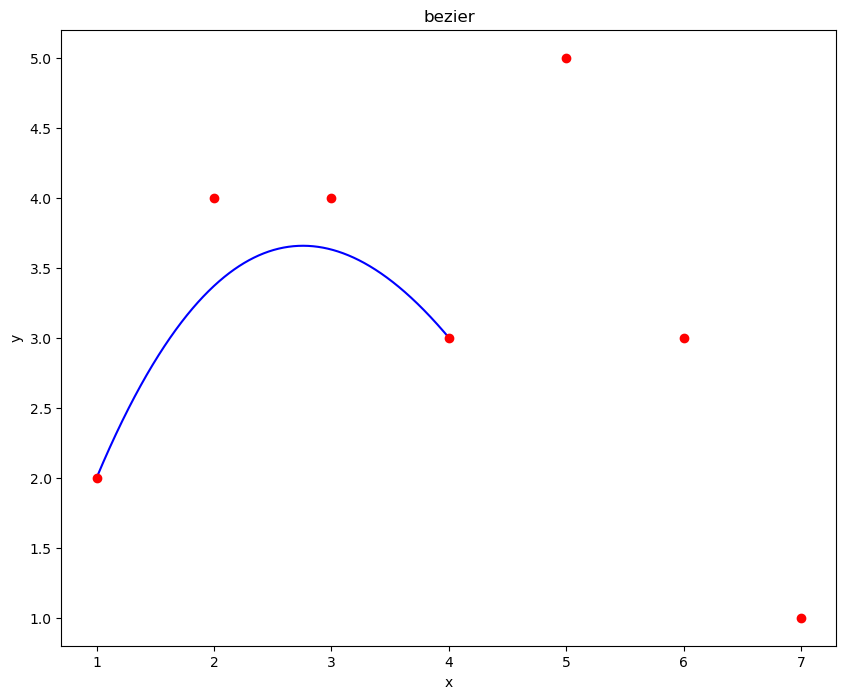

In [43]:
xs = x[0:4]
ys = y[0:4]
am =  [[1,0,0,0],[-3,3,0,0],[3,-6,3,0],[-1,3,-3,1]]
c = np.matmul(am,xs)

#to render at the end we discretize as a dense polyline. Not efficient
ls =np.linspace(0,1,1000)
xn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls 
c = np.matmul(am,ys)
yn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls  
plt.figure(figsize = (10,8))
plt.plot(xn, yn, 'b')

plt.title('bezier')
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Exercise: add the second segment for patchwise cubic bezier interpolation

* B-Spline

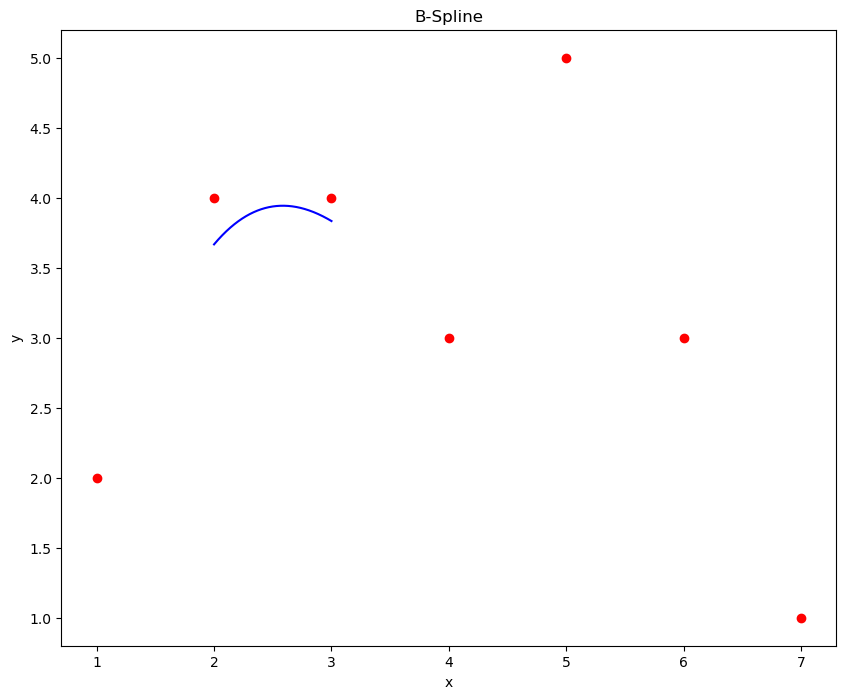

In [44]:
am = np.array([[1,4,1,0],[-3,0,3,0],[3,-6,3,0],[-1,3,-3,1]])/6
xs = x[0:4]
ys = y[0:4]


plt.figure(figsize = (10,8))
#interpolation is done independently in x, y (z)
c = np.matmul(am,xs)

#to render at the end we discretize as a dense polyline. Not efficient

ls =np.linspace(0,1,1000)
xn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls 

c = np.matmul(am,ys)
yn = c[0] + c[1]*ls + c[2]*ls*ls + c[3]*ls*ls*ls  

plt.plot(xn, yn, 'b')



plt.title('B-Spline')
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


Exercise: complete the patchwise cubic B-spline interpolation estimating the other segments 

<b> Exercise: starting from the same set of points, render a smooth curve by applying 4 times the Chaikin curve subdivision scheme (see slides) </b>

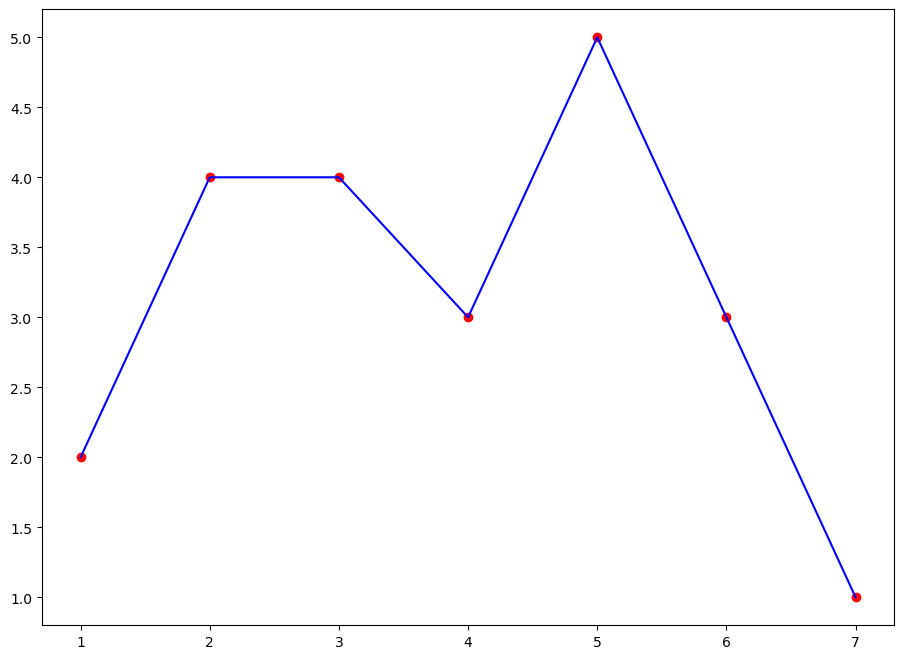

In [45]:
x = range(1,8)
y = [2,4,4,3,5,3,1]

# plot
plt.figure(figsize=(11, 8))
plt.plot(x, y, 'ro')
plt.plot(x, y, 'b-')
plt.show()